In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join
import Pk_library as PKL
import h5py
mpl.rcParams['figure.dpi'] = 250
import seaborn as sns
import pandas as pd
from tqdm import tqdm

## plot prior

In [2]:
cosmonames = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', r'$n_s$', r'$\sigma_8$']
hodnames = [r'$\alpha$', r'$\log M_0$', r'$\log M_1$',
            r'$\log M_{\min}$', r'$\sigma_{\log M}$']
names = cosmonames+hodnames

In [3]:
modeldir = '/anvil/scratch/x-mho1/cmass-ili/mtnglike/fastpm/models/galaxy/zPk0+zPk2/kmax-0.4'
theta_train = np.load(join(modeldir, 'theta_train.npy'))
theta_test = np.load(join(modeldir, 'theta_test.npy'))
theta = np.concatenate([theta_train, theta_test])

In [4]:
theta.max(axis=0), theta.min(axis=0)

(array([ 0.4999    ,  0.06999   ,  0.8999    ,  1.1999    ,  0.9995    ,
         1.49985418, 14.99979984, 14.99954652, 13.9998288 ,  0.59997389]),
 array([1.00500000e-01, 3.00100000e-02, 5.00100000e-01, 8.00100000e-01,
        6.00100000e-01, 1.40023870e-04, 1.30000347e+01, 1.30000297e+01,
        1.20005431e+01, 1.00047966e-01]))

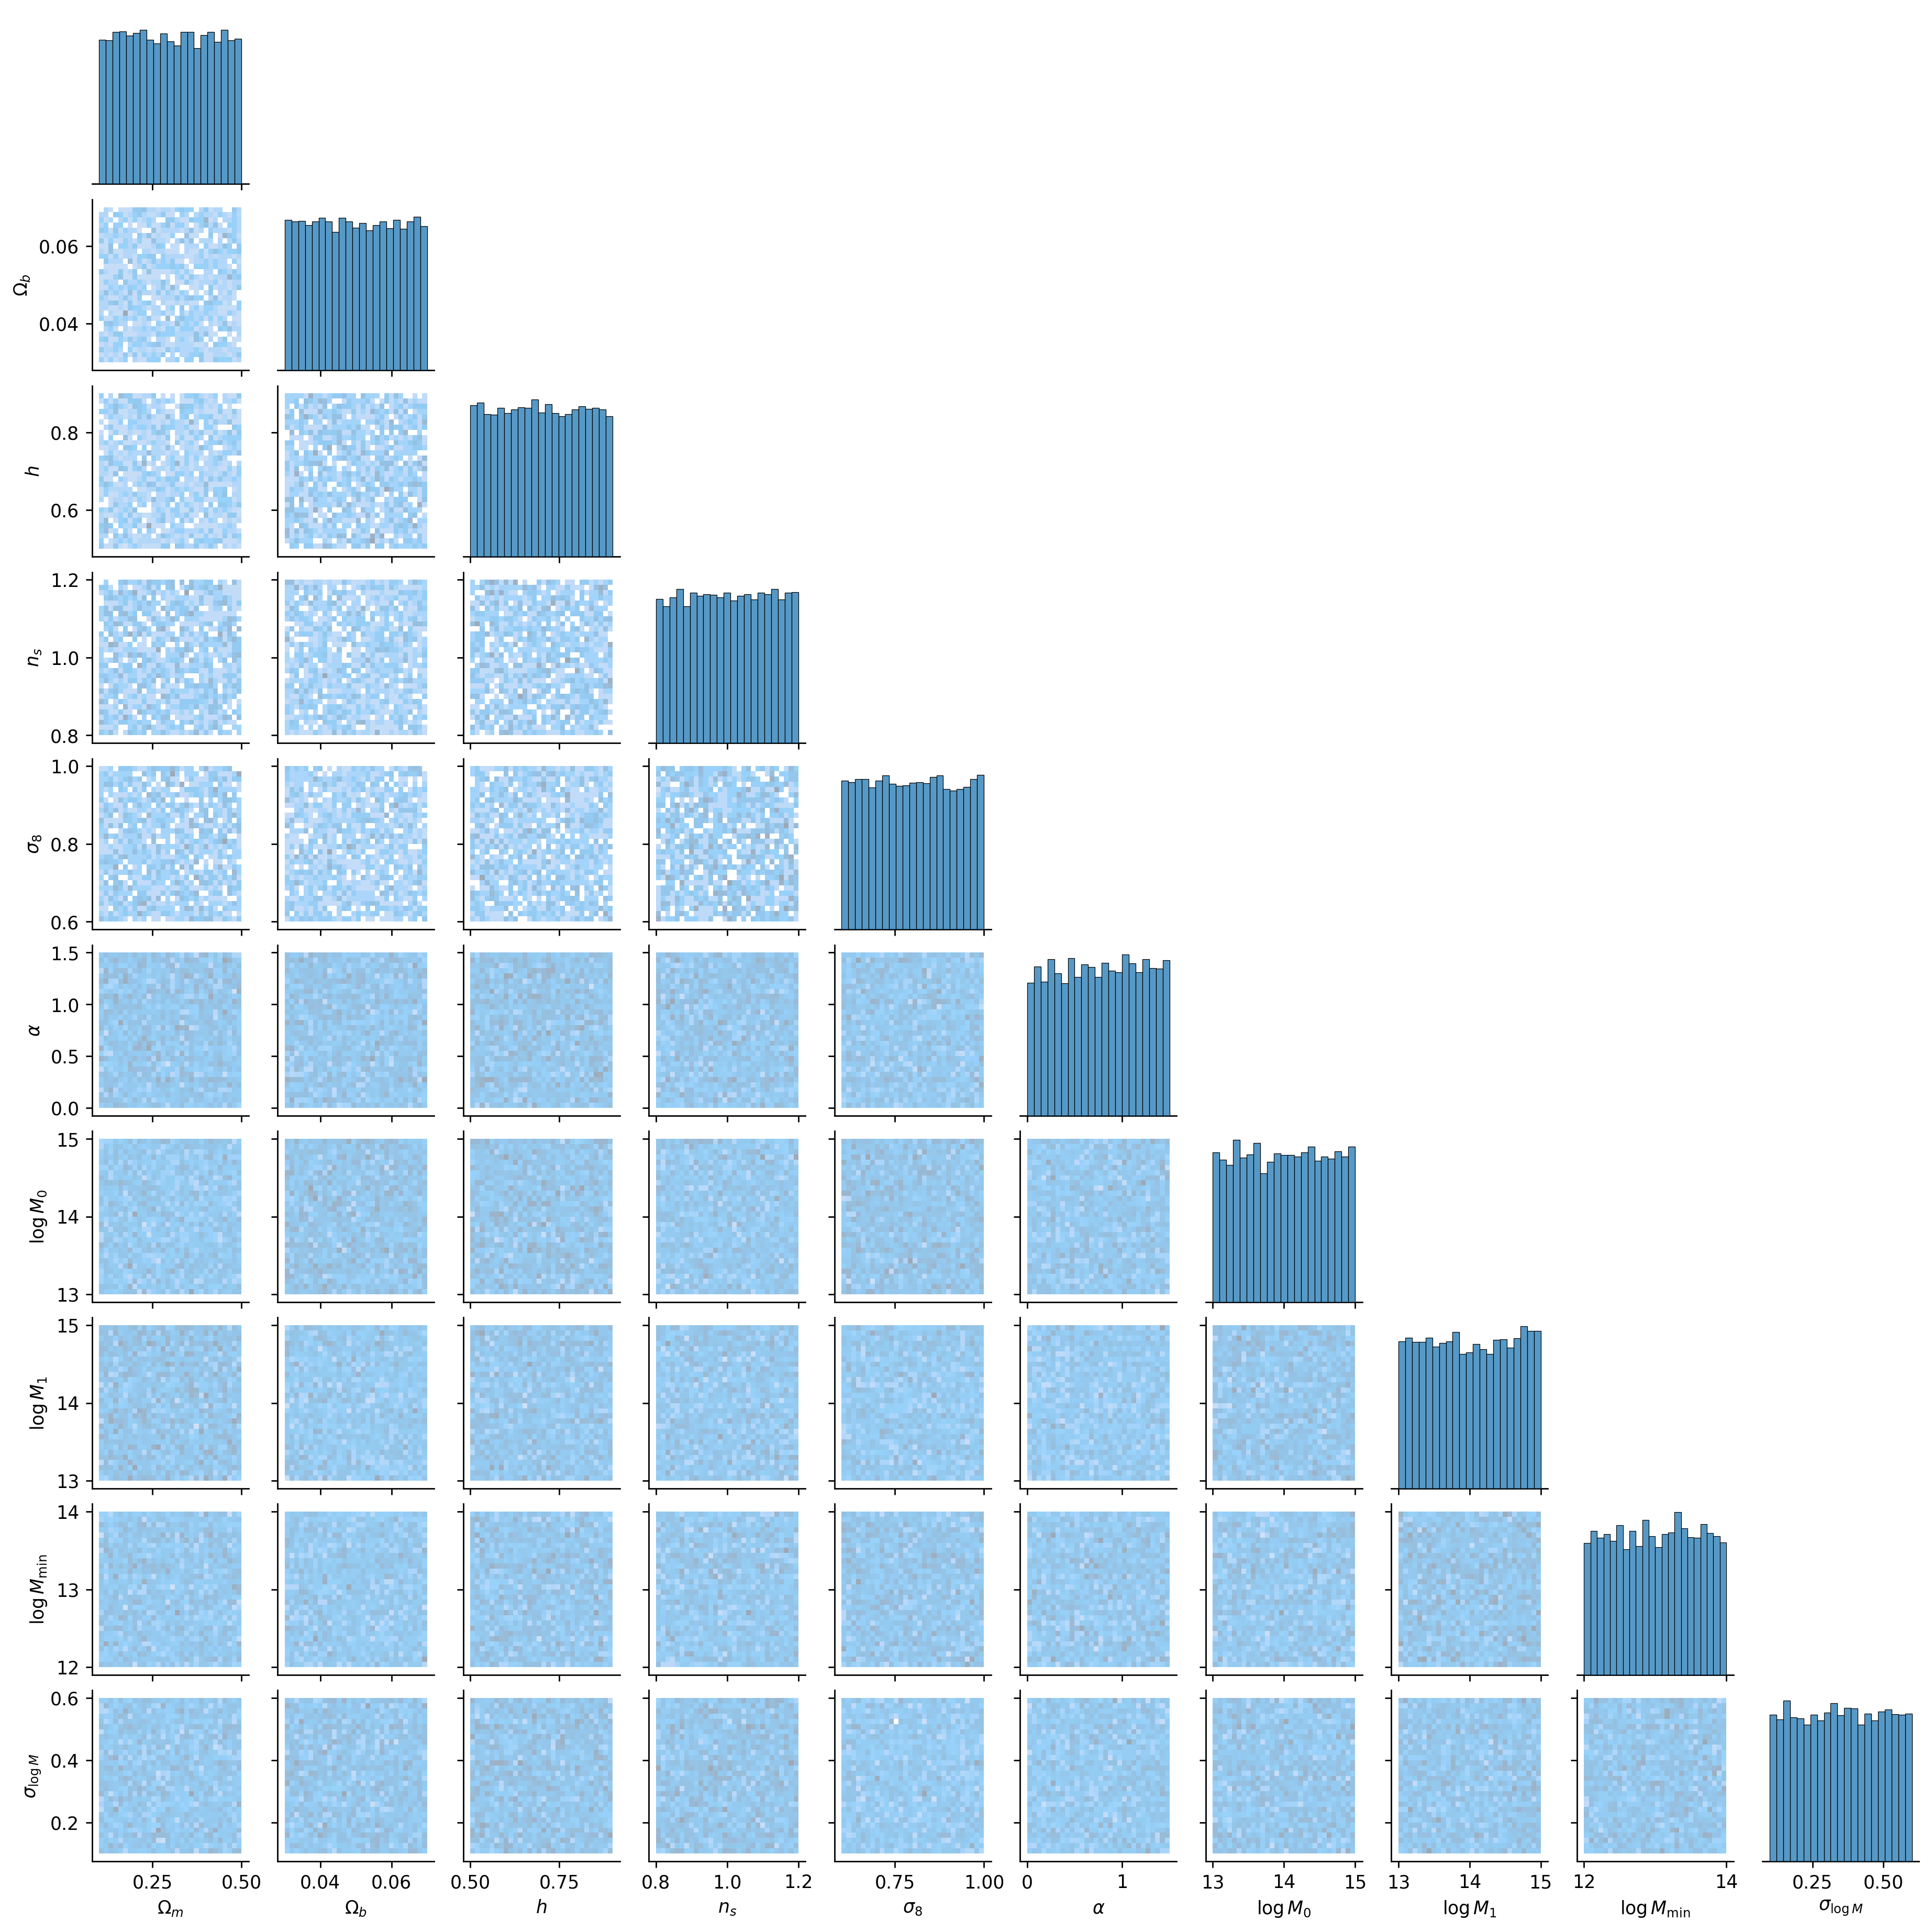

In [5]:
out = pd.DataFrame(theta, columns=names)
g = sns.pairplot(
    out,
    kind='hist',
    plot_kws={'alpha': 0.5, 'bins': 30},
    corner=True,
    height=1.5  # Adjust the height to make the figure smaller
)

## high-sigma8, low logMmin

In [ ]:
suitedir = '/anvil/scratch/x-mho1/cmass-ili/mtnglike/fastpm/L3000-N384'

for lhid in tqdm(os.listdir(suitedir)):
    diagpath = join(suitedir, lhid, 'diag', 'ngc_lightcone')
    if not os.path.exists(diagpath):
        continue
    for f in os.listdir(diagpath):
        try:
            with h5py.File(join(diagpath, f), 'r') as ff:
                truecosmo = ff.attrs['cosmo_params']
                truehod = ff.attrs['HOD_params']
        except:
            continue
        if (truecosmo[4] > 0.9) and (truehod[3] > 13.5):
            raise ValueError

  0%|          | 2/1941 [00:00<00:23, 83.79it/s]


ValueError: 

In [9]:

print(truecosmo, truehod)
print(lhid, f)

[0.4505  0.04933 0.7809  0.8029  0.9875 ] [ 0.77167556 13.23498571 13.85543306 13.60908921  0.50598143]
1668 hod16685_aug00000.h5


In [10]:
os.listdir(diagpath)

['hod16682_aug00000.h5',
 'hod16681_aug00000.h5',
 'hod16685_aug00000.h5',
 'hod16684_aug00000.h5',
 'hod16683_aug00000.h5']